Number of anomalies detected: 773


C:\Users\KEERTHI\AppData\Local\Temp\ipykernel_21132\768842925.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(non_anomalies[pair[0]],non_anomalies[pair[1]], cmap='coolwarm',color='blue', label='Non-Anomalies')
C:\Users\KEERTHI\AppData\Local\Temp\ipykernel_21132\768842925.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(anomalies[pair[0]],anomalies[pair[1]], cmap='coolwarm',color='yellow', label='Anomalies')


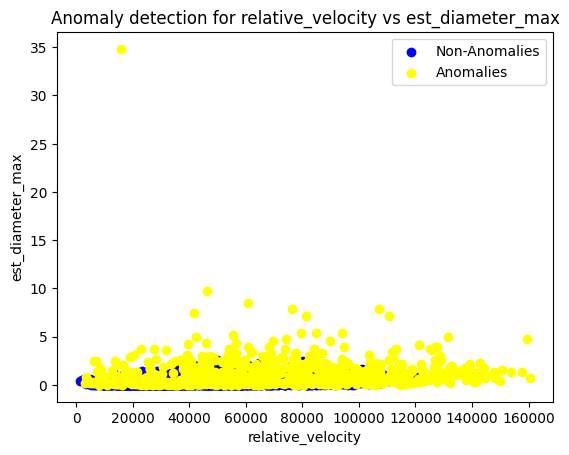

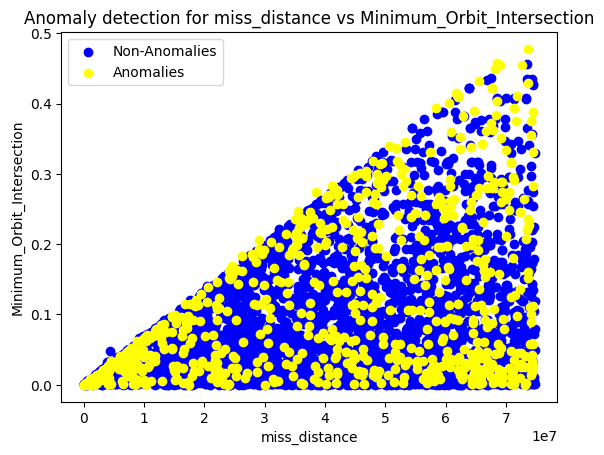

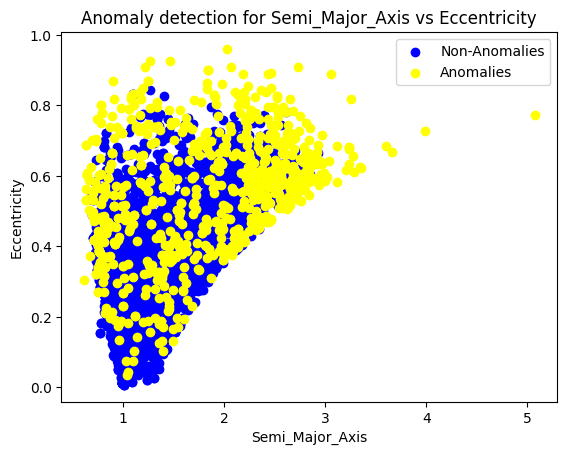

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load the asteroid dataset into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\KEERTHI\\OneDrive\\Documents\\Preprocessing\\nasa11.csv')

# Select relevant features for anomaly detection
features = ['ID','name','est_diameter_min','est_diameter_max','absolute_magnitude','Close_Approach_Date',
            'EpochDateCloseApproach','Relative_Velocity_km_per_sec','relative_velocity','Miles_per_hour',
            'miss_distance','orbiting_body','Orbit_ID','Orbit Determination Date','Orbit_Uncertainity',
            'Minimum_Orbit_Intersection','Jupiter_Tisserand Invariant','Epoch_Osculation','Eccentricity',
            'Semi_Major_Axis','Inclination','Asc_Node_Longitude','Orbital_Period',
            'Perihelion_Distance','Perihelion_Arg','Aphelion_Dist','Perihelion_Time','Mean_Anomaly','Mean_Motion','Equinox','Hazardous']
#features = ['ID','Name','Est Dia in M(min)', 'Est Dia in M(max)', 'Absolute Magnitude', 'Close Approach Date', 
 #           'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km/s', 'Miles per hour',
  #          'Miss Dist.(Astronomical)', 'Orbiting Body', 'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity', 
   #         'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 
    #        'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 
     #       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Equinox', 'Hazardous']

# Drop columns not relevant for anomaly detection
X = df.drop(['ID', 'name', 'Close_Approach_Date', 'EpochDateCloseApproach', 'Orbit Determination Date', 'orbiting_body', 'Equinox'], axis=1)

# Instantiate the Isolation Forest algorithm
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)

# Fit the model and predict anomalies
clf.fit(X)
y_pred = clf.predict(X)

# Add a column to the DataFrame indicating whether an asteroid is an anomaly or not
df['anomaly'] = np.where(y_pred == -1, True, False)

# Print the number of anomalies detected
num_anomalies = df['anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")

import matplotlib.pyplot as plt

# Select pairs of features for scatter plots
feature_pairs = [('relative_velocity','est_diameter_max'),
                 ('miss_distance', 'Minimum_Orbit_Intersection'),
                 ('Semi_Major_Axis', 'Eccentricity')]
anomalies = df[df['anomaly'] == True]
non_anomalies = df[df['anomaly'] == False]

# Create scatter plots for each pair of features
for pair in feature_pairs:
    plt.scatter(non_anomalies[pair[0]],non_anomalies[pair[1]], cmap='coolwarm',color='blue', label='Non-Anomalies')
    plt.scatter(anomalies[pair[0]],anomalies[pair[1]], cmap='coolwarm',color='yellow', label='Anomalies')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"Anomaly detection for {pair[0]} vs {pair[1]}")
    plt.legend()
    plt.show()
